# Regression Models

## Goals

In this Assignmnet :

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [2]:
#Your code Here
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [3]:
#Your code Here
#Read the trainig and testing data from the file
training_data = pd.read_csv("trainRegression.csv") # load the training dataset
print(f"Training Data: {training_data.shape}")
testing_data = pd.read_csv("testRegression.csv") # load the testing dataset
print(f"Testing_Data: {testing_data.shape}") 

Training Data: (283, 2)
Testing_Data: (32, 2)


### Show Data

In [4]:
#Your code Here
#Show the first 5 rows of the training data
print(training_data.head())   # show the sample of training dataset 



      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [5]:
#Your code Here
#TypeCast the data into numpy array
train_x = np.array(training_data['X']) # make Numpy Array 
train_y = np.array(training_data["R"]) # make Numpy Array

test_x = np.array(testing_data['X'])
test_y = np.array(testing_data["R"])

### Plot Data

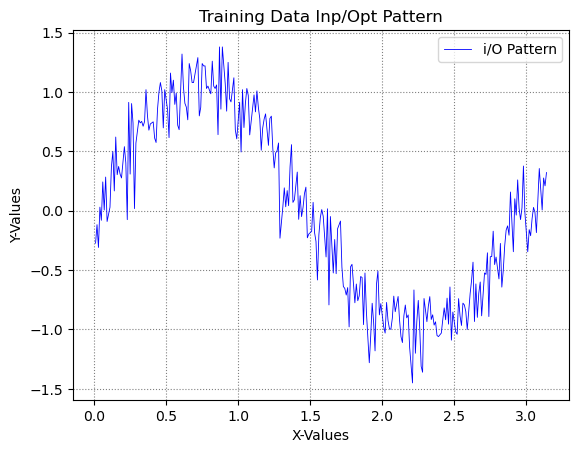

In [6]:
#Your code Here
#Plot your Training Data using matplotlib

plt.plot(train_x, train_y, linewidth=0.6, color='blue', linestyle='-', label='i/O Pattern')

# Add labels, title, and grid
plt.xlabel('X-Values')  # add x_axis label 
plt.ylabel('Y-Values')  # add y_axis label 
plt.title("Training Data Inp/Opt Pattern") # Title of Graph 
plt.grid(True, linestyle=':', color='gray') # Add grids

plt.legend()

plt.show()

##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [7]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

n_rows = train_x.shape[0]  # shape attribute returns the size in tuple (we get o indexed value(no rows))
#print(n_rows)
sum_train_x = np.sum(train_x) # sum of x variable 
#print(f"{sum_train_x:.2f}")  
sum_square_train_x = np.sum(train_x **  2) # sum of square of x _values 
#print(f"{square_sum_train_x:.2f}")




metrix_a = np.zeros((2,2))  # Creat empty 2D Numpy Array which is filled with zeroes 
#print(metrix_a.shape)
metrix_a[0,0] = n_rows      # Access the specific index(0_row,0_col) and filled value with n_rows 
metrix_a[0,1] = sum_train_x
metrix_a[1,0] = sum_train_x
metrix_a[1,1] = sum_square_train_x
print(f"Metrix A: \n{metrix_a}")


metrix_b = np.zeros((2,1))   # Create the Metrix b 
sum_y = np.sum(train_y)      # sum of y values 
sum_xy  = sum(train_x * train_y) # multiply x with y element wise and sum of it 
print()

metrix_b[0,0] = sum_y        # assigning value to metrix B 
metrix_b[1,0] = sum_xy       # 
print(f"Metrix B: \n{metrix_b}")  # print the numpy array 

Metrix A: 
[[283.     444.95  ]
 [444.95   932.7465]]

Metrix B: 
[[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [8]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1

metrix_a_inv = np.linalg.inv(metrix_a)
x_model = np.dot(metrix_a_inv,metrix_b)
theta_zero = x_model[0,0]
theta_one = x_model[1,0]
print(f"Metrix X for the linear Model: \n{x_model}")

Metrix X for the linear Model: 
[[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [9]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

test_pred = (test_x * theta_one)+ theta_zero #make the test Predictions 
test_pred

array([ 0.8736061 ,  0.81835502,  0.76310395,  0.70785287,  0.6526018 ,
        0.59735072,  0.54209965,  0.48684858,  0.4315975 ,  0.37634643,
        0.32109535,  0.26584428,  0.2105932 ,  0.15534213,  0.10009106,
        0.04483998, -0.01041109, -0.06566217, -0.12091324, -0.17616432,
       -0.23141539, -0.28666646, -0.34191754, -0.39716861, -0.45241969,
       -0.50767076, -0.56292184, -0.61817291, -0.67342398, -0.72867506,
       -0.78392613, -0.83917721])

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [10]:
#Your code Here
#Using cost function calculate the cost of the model
#print(test_y.shape)
cost_func = (sum(((test_pred - test_y)**2)))/((test_y.shape[0]))  # use mean squared Error(Loss Function)

print(f"Mean Square Error for Linear Model is:: {cost_func}")

Mean Square Error for Linear Model is:: 0.3159321720459774


Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

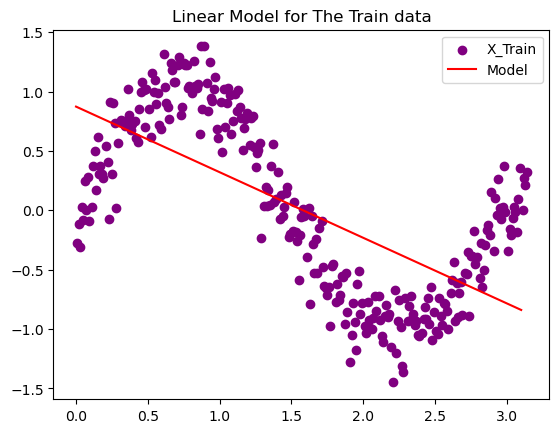

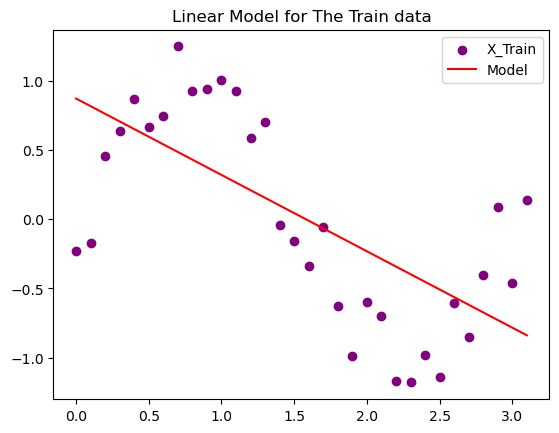

In [12]:
plt.scatter(train_x, train_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data") # plot the Data Set 

plt.plot(test_x,test_pred,color='red',label='Model')
plt.legend()
plt.show()


print()
plt.scatter(test_x, test_y, 
            color='purple', 
            label="X_Test", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Test data") # plot the Data Set 

plt.plot(test_x,test_pred,color='red',label='Model')
plt.legend()
plt.show()

### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [14]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

# highest power of equation + 1 

n = 2 + 1  # ax^2 + bx + c 
metrix_A = np.zeros((n,n))

metrix_A[0,0] = train_x.shape[0]
x = train_x
xx = (x * x)
xxx  = (xx * x )
xxxx = (xxx * x )

# put the Values in Metrix A  
metrix_A[0,0] = train_x.shape[0]
metrix_A[0,1] = sum(x) 
metrix_A[0,2] = sum(xx) 
metrix_A[1,0] = sum(x) 
metrix_A[1,1] = sum(xx) 
metrix_A[1,2] = sum(xxx) 
metrix_A[2,0] = sum(xx) 
metrix_A[2,1] = sum(xxx) 
metrix_A[2,2] = sum(xxxx) 
print(f"Metrix_A : \n{metrix_A}")


metrix_B = np.zeros((n,1))
y = train_y
yx = y * x 
yxx = y * xx 



metrix_B[0,0] = sum(y) # PUt values in Metrix B 
metrix_B[1,0] = sum(yx) 
metrix_B[2,0] = sum(yxx) 
print(f"Metrix B: \n{metrix_B}")

Metrix_A : 
[[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]
Metrix B: 
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [15]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2

inverse_metrix = np.linalg.inv(metrix_A)  # Take inverse of Metrix A 
quadratic_model = np.dot(inverse_metrix , metrix_B) # Multiplication of Metrix 
print(f"Metrix X for The Quadratic Model: \n{quadratic_model}")

theta_0 = quadratic_model[0,0]   # access the theta_0 
theta_1 =quadratic_model[1,0]    # access the theta_1
theta_2 = quadratic_model[2,0]   # access the theta_2


Metrix X for The Quadratic Model: 
[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [16]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

pred = ((test_x*test_x) * theta_2) + (test_x * theta_1) + theta_0  # Get the Predictions 
pred   

array([ 1.10611454,  1.0079184 ,  0.91254317,  0.81998887,  0.73025548,
        0.643343  ,  0.55925145,  0.47798081,  0.39953109,  0.32390228,
        0.25109439,  0.18110742,  0.11394137,  0.04959623, -0.01192799,
       -0.0706313 , -0.12651368, -0.17957515, -0.22981571, -0.27723534,
       -0.32183406, -0.36361187, -0.40256875, -0.43870472, -0.47201977,
       -0.50251391, -0.53018713, -0.55503943, -0.57707081, -0.59628128,
       -0.61267083, -0.62623946])

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [17]:
#Your code Here
#Using cost function calculate the cost of the model

cost = sum((pred - test_y)**2)/((test_y.shape[0]))  # Mean Squared Error 
print(f'Mean Squared Error for Quadratic Model is: {cost}')

Mean Squared Error for Quadratic Model is: 0.3260417959496274


Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

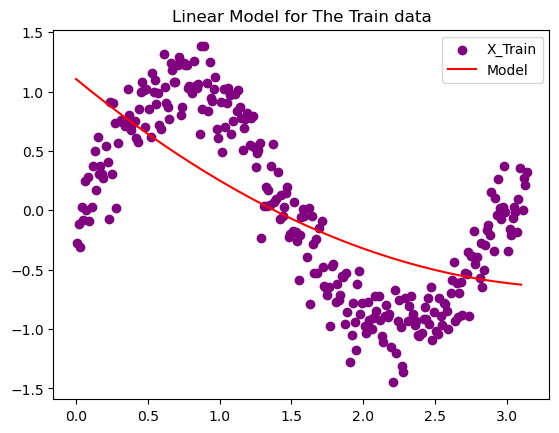

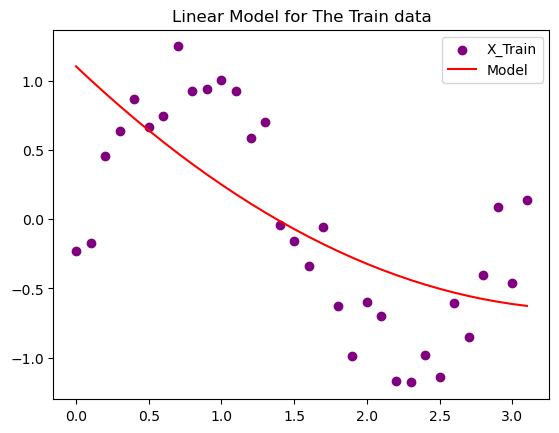

In [18]:
##Your code Here
#Plot the predicted values of y against the test_x


plt.scatter(train_x, train_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,pred,color='red',label='Model')
plt.legend()
plt.show()

print()



plt.scatter(test_x, test_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,pred,color='red',label='Model')
plt.legend()
plt.show()

### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [19]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 



# highest power of equation + 1 

n = 3 + 1  # ax^2 + bx + c 
Metrix_A = np.zeros((n,n))

# Get the values of metrix 
Metrix_A[0,0] = train_x.shape[0]
x = train_x
xx = (x * x)
xxx  = (xx * x )
xxxx = (xxx * x )
xxxxx = xxxx * x 
xxxxxx = xxxxx * x 

# PUt the Values in Metrix A
Metrix_A[0,0] = train_x.shape[0]
Metrix_A[0,1] = sum(x) 
Metrix_A[0,2] = sum(xx)
Metrix_A[0,3] = sum(xxx)

Metrix_A[1,0] = sum(x) 
Metrix_A[1,1] = sum(xx) 
Metrix_A[1,2] = sum(xxx)
Metrix_A[1,3] = sum(xxxx)

Metrix_A[2,0] = sum(xx) 
Metrix_A[2,1] = sum(xxx) 
Metrix_A[2,2] = sum(xxxx) 
Metrix_A[2,3] = sum(xxxxx)

Metrix_A[3,0] = sum(xxx) 
Metrix_A[3,1] = sum(xxxx) 
Metrix_A[3,2] = sum(xxxxx) 
Metrix_A[3,3] = sum(xxxxxx)



print(f"Metrix_A : \n{Metrix_A}")
print()

Metrix_B = np.zeros((n,1))
y = train_y
yx = y * x 
yxx = y * xx 
yxxx = yxx * x 

Metrix_B[0,0] = sum(y)
Metrix_B[1,0] = sum(yx) 
Metrix_B[2,0] = sum(yxx)
Metrix_B[3,0] = sum(yxxx)
print(f"Metrix B: \n{Metrix_B}")


Metrix_A : 
[[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Metrix B: 
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [20]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

inverse_Metrix_A = np.linalg.inv(Metrix_A)
cubic_model = np.dot(inverse_Metrix_A , Metrix_B)

Theta_0 = cubic_model[0,0]
Theta_1 = cubic_model[1,0]
Theta_2 = cubic_model[2,0]
Theta_3 = cubic_model[3,0]
 
print(f"Metrix X for the Cubic Model: \n{cubic_model}")

Metrix X for the Cubic Model: 
[[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [21]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

cubic_pred = Theta_0 + (Theta_1 * test_x) + (Theta_2 * (test_x*test_x)) + (Theta_3 * (test_x * test_x * test_x))


### Mean Square Error

In [22]:
#Your code Here
#Using cost function calculate the cost of the model

cubic_cost = (sum((cubic_pred - test_y)**2))/((test_y.shape[0]))
print(cubic_cost)

0.051542057690947524


Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

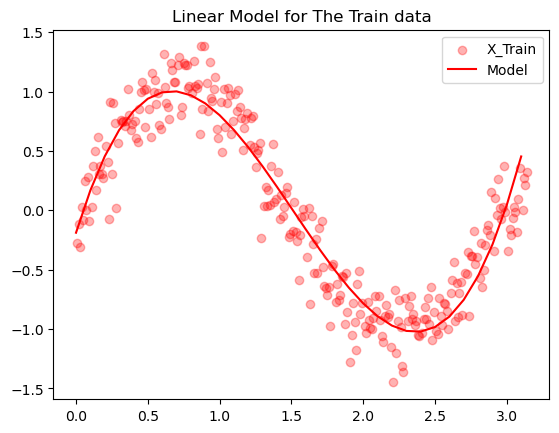

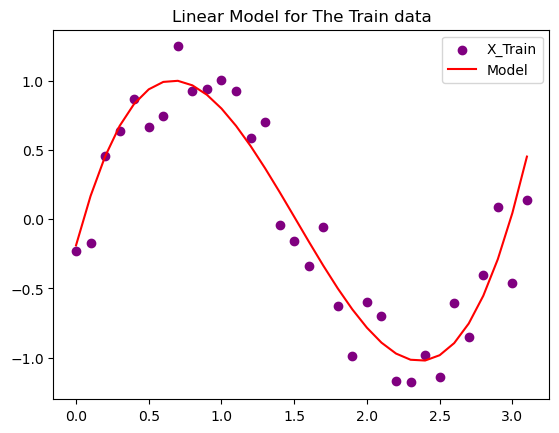

In [23]:
##Your code Here
#Plot the predicted values of y against the test_x


##Your code Here
#Plot the predicted values of y against the test_x


plt.scatter(train_x, train_y, 
            color='red', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            alpha=0.3,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,cubic_pred,color='red',label='Model')
plt.legend()
plt.show()

print()



plt.scatter(test_x, test_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,cubic_pred,color='red',label='Model')
plt.legend()
plt.show()

### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

### Extra Work that takes int  of higher degree equation ,solve the unknown parameters 

Metrix A : 
[[2.83000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [7.01172536e+06 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [2.03540142e+07 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.94369276e+07 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06]
 [1.74456748e+08 7.01172536e+06 2.03540142e+07 5.94369276e+07
  1.74456748e+08]]

Metrix B : 
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]
Mean Square Error: 0.7941223505555927


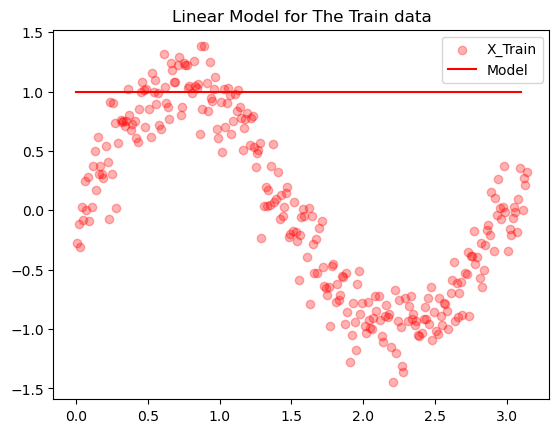

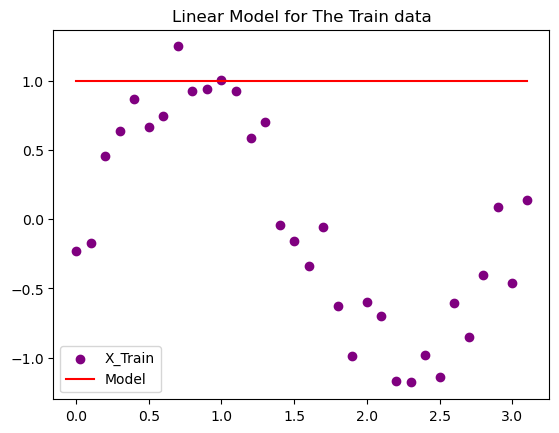

In [32]:
#Your code Here

h_power = 4
prm = h_power + 1 

Metrix_A4D = np.zeros((prm,prm))
Metrix_B4D = np.zeros((prm,1))
Metrix_B4D[0,0] = sum(train_y)

for row in range(1,prm):
    Metrix_B4D[row,0]  = sum((x**row) * (train_y))


X = np.copy(x)
temp_metrix = np.zeros((train_x.shape[0],prm))

for col in range(1,prm):
    temp_metrix[:,col] = X**col

X = X.reshape(283,1)    
for i  in range(1,prm):
 
    temp_metrix  = ((temp_metrix) * (X**i)) 
    for j in range(prm):
        Metrix_A4D[i,j] = sum(temp_metrix[:,j])  


for idx in range(1,len(temp_metrix[0,:])):
    Metrix_A4D[idx,0] =  sum(temp_metrix[:,idx])
    
Metrix_A4D[0,0] = train_x.shape[0]    
print(f"Metrix A : \n{Metrix_A4D}")
print()
print(f"Metrix B : \n{Metrix_B4D}")





# Metrix Multiplication and Finding Unknown Parameters 

inv_Metrix_A4D = np.linalg.inv(Metrix_A4D)
model_4D = np.dot(inv_Metrix_A4D, Metrix_A4D)

f_pred  = 0 
for i in range(1,len(model_4D)):
    f_pred += (model_4D[i,0] * (test_x**i ))
    
f_pred += model_4D[0,0] 
#print(f_pred)


# Mean Square Error 
mse_4d  = (sum((test_y - f_pred)**2))/(2 * test_y.shape[0])
print(f"Mean Square Error: {mse_4d}")



# PLot the Graphs 

plt.scatter(train_x, train_y, 
            color='red', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            alpha=0.3,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,f_pred,color='red',label='Model')
plt.legend()
plt.show()

print()



plt.scatter(test_x, test_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Train data")

plt.plot(test_x,f_pred,color='red',label='Model')
plt.legend()
plt.show()



In [47]:
Metrix_A = np.zeros((5,5))


Metrix_A[0,0] = train_x.shape[0]
Metrix_A[0,1] = sum(x)
Metrix_A[0,2] = sum(xx)
Metrix_A[0,3] = sum(xxx)
Metrix_A[0,4] = sum(xxxx)

Metrix_A[1,0] = sum(x)
Metrix_A[1,1] = sum(xx)
Metrix_A[1,2] = sum(xxx)
Metrix_A[1,3] = sum(xxxx)
Metrix_A[1,4] = sum(xxxxx)


Metrix_A[2,0] = sum(xx)
Metrix_A[2,1] = sum(xxx)
Metrix_A[2,2] = sum(xxxx)
Metrix_A[2,3] = sum(xxxxx)
Metrix_A[2,4] = sum(xxxxxx)


Metrix_A[3,0] = sum(xxx)
Metrix_A[3,1] = sum(xxxx)
Metrix_A[3,2] = sum(xxxxx)
Metrix_A[3,3] = sum(xxxxxx)
Metrix_A[3,4] = sum(xxxxxx * x )


Metrix_A[4,0] = sum(xxxx)
Metrix_A[4,1] = sum(xxxxx)
Metrix_A[4,2] = sum(xxxxxx)
Metrix_A[4,3] = sum(xxxxxx * x)
Metrix_A[4,4] = sum(xxxxxx * xx )

Metrix_B = np.zeros((5,1))

Metrix_B[0,0]  = sum(y)
Metrix_B[1,0] = sum(y * x )
Metrix_B[2,0] = sum(y * xx )
Metrix_B[3,0] = sum(y * xxx )
Metrix_B[4,0] = sum(y * xxxx )


print(f"Metrix A: \n{Metrix_A}")
print(f"Metrix A: \n{Metrix_B}")

Metrix_A_inv = np.linalg.inv(Metrix_A)
fd_model = np.dot(Metrix_A_inv,Metrix_B)
print(fd_model)
t_0 = fd_model[0,0]
t_1 = fd_model[1,0]
t_2 = fd_model[2,0]
t_3 = fd_model[3,0]
t_4 = fd_model[4,0]


fd_pred = (t_0) + (t_1*(test_x)) + (t_2*(test_x**2)) + (t_3*(test_x**3)) + (t_4*(test_x**4))

mse_fd = (sum((fd_pred - test_y)))/(2*test_x.shape[0])
print(mse_fd)






Metrix A: 
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]
Metrix A: 
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]
[[-0.40789474]
 [ 5.3320982 ]
 [-5.77179206]
 [ 1.81519401]
 [-0.15632916]]
0.010033433556764676


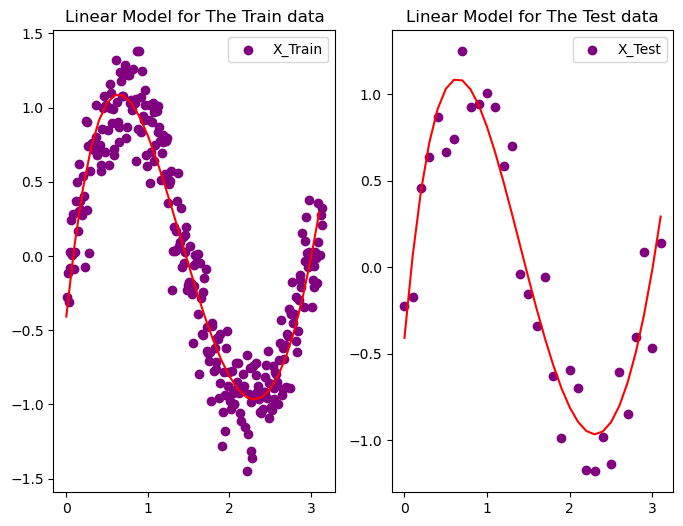

In [40]:
# PLot the Graphs 

fig , axes  = plt.subplots(nrows =1 ,ncols = 2, figsize = (8,6))

axes[0].scatter(train_x, train_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.3,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
axes[0].legend()

line1 = axes[0].set_title("Linear Model for The Train data")

axes[0].plot(test_x,fd_pred,color='red',label='Model')
#axes[0].set_ylim(-0.5,2)



axes[1].scatter(test_x, test_y, 
            color='purple', 
            label="X_Test", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
plt.legend()
plt.title("Linear Model for The Test data")
#axes[1].set_ylim(-.5,2)
axes[1].plot(test_x,fd_pred,color='red',label='Model')
plt.show()



## Now Fit The 5 degree Model

In [48]:
# 5th degree polynomials, 6 unknown Parameters

h_d = 5 
par = 6
Metrix_A6 = np.zeros((par,par)) # i use the A6 (6 by 6 Metrix )

x  = train_x 
x2 = x * x 
x3 = x2 * x 
x4 = x2 * x2 
x5 = x3 * x2 
x6 = x3 * x3 
x7  = x6 * x



# fill the Metrix A

Metrix_A6[0,0] = train_x.shape[0]
Metrix_A6[0,1] = sum(x)
Metrix_A6[0,2] = sum(x2)
Metrix_A6[0,3] = sum(x3)
Metrix_A6[0,4] = sum(x4)
Metrix_A6[0,5] = sum(x5)

Metrix_A6[1,0] = sum(x)
Metrix_A6[1,1] = sum(x2)
Metrix_A6[1,2] = sum(x3)
Metrix_A6[1,3] = sum(x4)
Metrix_A6[1,4] = sum(x5)
Metrix_A6[1,5] = sum(x6)


Metrix_A6[2,0] = sum(x2)
Metrix_A6[2,1] = sum(x3)
Metrix_A6[2,2] = sum(x4)
Metrix_A6[2,3] = sum(x5)
Metrix_A6[2,4] = sum(x6)
Metrix_A6[2,5] = sum(x7)

Metrix_A6[3,0] = sum(x3)
Metrix_A6[3,1] = sum(x4)
Metrix_A6[3,2] = sum(x5)
Metrix_A6[3,3] = sum(x6)
Metrix_A6[3,4] = sum(x7  )
Metrix_A6[3,4] = sum(x7 * x )


Metrix_A6[4,0] = sum(x4)
Metrix_A6[4,1] = sum(x5)
Metrix_A6[4,2] = sum(x6)
Metrix_A6[4,3] = sum(x7)
Metrix_A6[4,4] = sum(x7 * x)
Metrix_A6[4,4] = sum(x7 * x2)

Metrix_A6[5,0] = sum(x5)
Metrix_A6[5,1] = sum(x6)
Metrix_A6[5,2] = sum(x7)
Metrix_A6[5,3] = sum(x7 * x)
Metrix_A6[5,4] = sum(x5 * x4)
Metrix_A6[5,5] = sum(x5 * x5)


Metrix_B6 = np.zeros((par,1))
y =  train_y
Metrix_B6[0,0]  = sum(y) # Fil the Metrix B 
Metrix_B6[1,0] = sum(y * x )
Metrix_B6[2,0] = sum(y * x2)
Metrix_B6[3,0] = sum(y * x3 )
Metrix_B6[4,0] = sum(y * x4 )
Metrix_B6[5,0] = sum(y * x5 )


print(f"Metrix A: \n{Metrix_A6}")
print(f"Metrix A: \n{Metrix_B6}")

Metrix_A6_inv = np.linalg.inv(Metrix_A6)
d5_model = np.dot(Metrix_A6_inv,Metrix_B6)

# Access the unknown parameters 
th_0 = d5_model[0,0]
th_1 = d5_model[1,0]
th_2 = d5_model[2,0]
th_3 = d5_model[3,0]
th_4 = d5_model[4,0]
th_5 = d5_model[5,0]

d5_pred = (th_0) + (th_1*(test_x)) + (th_2*(test_x**2)) + (th_3*(test_x**3)) + (th_4*(test_x**4)) + (th_5 * (test_x**5))

# Mean Square Error 
mse_d5 = (sum((d5_pred - test_y)**2))/(test_x.shape[0])
print()
print(f"Mean Squared Error : {mse_d5}")
















Metrix A: 
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  3.00624107e+05 0.00000000e+00]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  8.50829605e+05 0.00000000e+00]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]
Metrix A: 
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]

Mean Squared Error : 0.0523382420983059


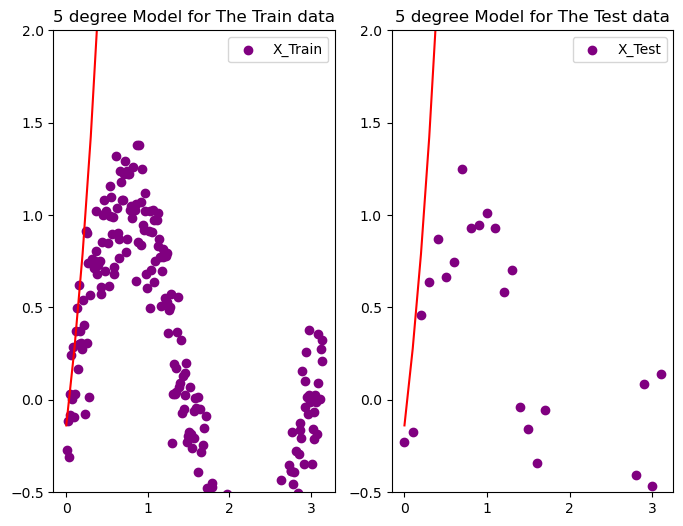

In [31]:
# PLot the Graphs 

fig , axes  = plt.subplots(nrows =1 ,ncols = 2, figsize = (8,6))

axes[0].scatter(train_x, train_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.3,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
axes[0].legend()

line1 = axes[0].set_title("5 degree Model for The Train data")

axes[0].plot(test_x,d5_pred,color='red',label='Model')
axes[0].set_ylim(-0.5,2)



axes[1].scatter(test_x, test_y, 
            color='purple', 
            label="X_Test", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
plt.legend()
plt.title("5 degree Model for The Test data")
axes[1].set_ylim(-.5,2)
axes[1].plot(test_x,d5_pred,color='red',label='Model')
plt.show()


## Now Fit The 6 degree Model

In [44]:
#Your code Here


# 5th degree polynomials, 6 unknown Parameters

h_d = 6 
par = 7
Metrix_A7 = np.zeros((par,par)) # i use the A6 (6 by 6 Metrix )

x  = train_x 
x2 = x * x 
x3 = x2 * x 
x4 = x2 * x2 
x5 = x3 * x2 
x6 = x3 * x3 
x7  = x6 * x



# fill the Metrix A 

Metrix_A7[0,0] = train_x.shape[0]
Metrix_A7[0,1] = sum(x)
Metrix_A7[0,2] = sum(x2)
Metrix_A7[0,3] = sum(x3)
Metrix_A7[0,4] = sum(x4)
Metrix_A7[0,5] = sum(x5)
Metrix_A7[0,6] = sum(x6)

Metrix_A7[1,0] = sum(x)
Metrix_A7[1,1] = sum(x2)
Metrix_A7[1,2] = sum(x3)
Metrix_A7[1,3] = sum(x4)
Metrix_A7[1,4] = sum(x5)
Metrix_A7[1,5] = sum(x6)
Metrix_A7[1,6] = sum(x7)


Metrix_A7[2,0] = sum(x2)
Metrix_A7[2,1] = sum(x3)
Metrix_A7[2,2] = sum(x4)
Metrix_A7[2,3] = sum(x5)
Metrix_A7[2,4] = sum(x6)
Metrix_A7[2,5] = sum(x7)
Metrix_A7[2,6] = sum(x7 * x)

Metrix_A7[3,0] = sum(x3)
Metrix_A7[3,1] = sum(x4)
Metrix_A7[3,2] = sum(x5)
Metrix_A7[3,3] = sum(x6)
Metrix_A7[3,4] = sum(x7  )
Metrix_A7[3,5] = sum(x7*x )
Metrix_A7[3,6] = sum(x7*x2 )


Metrix_A7[4,0] = sum(x4)
Metrix_A7[4,1] = sum(x5)
Metrix_A7[4,2] = sum(x6)
Metrix_A7[4,3] = sum(x7)
Metrix_A7[4,4] = sum(x7 * x)
Metrix_A7[4,5] = sum(x7 * x2)
Metrix_A7[4,6] = sum(x7 * x3)


Metrix_A7[5,0] = sum(x5)
Metrix_A7[5,1] = sum(x6)
Metrix_A7[5,2] = sum(x7)
Metrix_A7[5,3] = sum(x7 * x)
Metrix_A7[5,4] = sum(x5 * x4)
Metrix_A7[5,5] = sum(x5 * x5)
Metrix_A7[5,6] = sum(x5 * x6)


Metrix_A7[6,0] = sum(x6)
Metrix_A7[6,1] = sum(x7)
Metrix_A7[6,2] = sum(x7 * x)
Metrix_A7[6,3] = sum(x7 * x2)
Metrix_A7[6,4] = sum(x5 * x5)
Metrix_A7[6,5] = sum(x5 * x6)
Metrix_A7[6,6] = sum(x6 * x6)

# fill The Metrix B 
Metrix_B7 = np.zeros((par,1))
y =  train_y
Metrix_B7[0,0]  = sum(y)
Metrix_B7[1,0] = sum(y * x )
Metrix_B7[2,0] = sum(y * x2)
Metrix_B7[3,0] = sum(y * x3 )
Metrix_B7[4,0] = sum(y * x4 )
Metrix_B7[5,0] = sum(y * x5 )
Metrix_B7[6,0] = sum(y * x6 )


print(f"Metrix A: \n{Metrix_A7}")
print()
print(f"Metrix B: \n{Metrix_B7}")

Metrix_A7_inv = np.linalg.inv(Metrix_A7) # Take inverse of Metrix A 
d5_model = np.dot(Metrix_A7_inv,Metrix_B7) # Make Metrix mulitplication 

# access the Unknown parameters 
th_0 = d5_model[0,0]
th_1 = d5_model[1,0]
th_2 = d5_model[2,0]
th_3 = d5_model[3,0]
th_4 = d5_model[4,0]
th_5 = d5_model[5,0]
th_6 = d5_model[6,0]

d6_pred = (th_0) + (th_1*(test_x)) + (th_2*(test_x**2)) + (th_3*(test_x**3)) + (th_4*(test_x**4)) + (th_5 * (test_x**5)) + (th_6* (test_x**6))
print()
mse_d6 = (sum((d6_pred - test_y)**2))/(test_x.shape[0])
print(f"Mean Squared Error : {mse_d6}")



Metrix A: 
[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]

Metrix B: 
[[ 1.39087000e+00]
 [-1.26641429e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]

Mean Squared Error : 0.04450867575197704


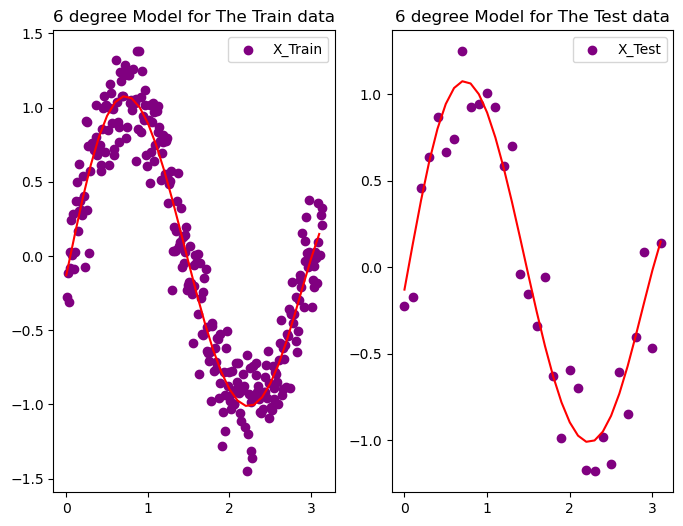

In [46]:
# PLot the Graphs 

fig , axes  = plt.subplots(nrows =1 ,ncols = 2, figsize = (8,6))

axes[0].scatter(train_x, train_y, 
            color='purple', 
            label="X_Train", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.3,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
axes[0].legend()

line1 = axes[0].set_title("6 degree Model for The Train data")

axes[0].plot(test_x,d6_pred,color='red',label='Model')
#axes[0].set_ylim(-0.5,2)



axes[1].scatter(test_x, test_y, 
            color='purple', 
            label="X_Test", 
              # Diamond marker
            #s=80,         # Marker size 
            #alpha=0.5,    # Transparency
            #edgecolors='black', # color at edge of bubble 
            #linewidths=1
           ) 
plt.legend()
plt.title("6 degree Model for The Test data")
#axes[1].set_ylim(-.5,2)
axes[1].plot(test_x,d6_pred,color='red',label='Model')
plt.show()


### Comment on the results by comparing all of your models

Comparison of diff Models 
Model       : Mse(cost) 


linear Model: .3152 
2nd Degree Model: .326041795949627 
3rd Degree Model: 0.051542057690947524
4th Degree Model: 0.010
5th Degree Model: 0.0523
6th Degree Model: 0..445 